# Assignment 10 - Use linear regression with the MPG data 
## Author: Jonathan Heard
## Class: CIS256DA

## The data file for this project is available from the Seaborn website. 
##  To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg').

Tasks

 1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg').
 2. Display the first five rows of data.
 3. Get the correlation data for the mpg column. Sort the results to make it easier to see the columns with the stronger correlations.
 4. Use the column with the strongest positive or negative correlation to the mpg column to split the data into test and training datasets, 
     where the test dataset consists of 20% of the total dataset. Be sure to specify a value for the random_state parameter.
 5. Create a linear regression model from the training dataset.
 6. Score the model using the test dataset.
 7. Score the model using the training dataset.
 8. Predict the y values based on the x values in the test dataset, and store the results in a variable. Then, put the predicted values in a new DataFrame.
 9. Join the y_test and predicted data with the x_test data, save the combined data in a new DataFrame, and then display the first five rows of data.
10. Add the residuals to the new DataFrame created in step 9.
11. Plot the residuals in a Seaborn KDE plot.
12. Melt the actual and predicted MPG columns together, assigning appropriate values to the variable and value names.
13. Use a Seaborn scatter plot to plot the predicted data.

After completing the assignment, please submit your .ipynb file.



## Import required modules

In [1]:
# Import the modules needed for this project.

# Import pandas and assign the alias pd
import pandas as pd

# Import Seaborn and assign the alias sns
import seaborn as sns

# Import the Scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Tasks list

In [2]:
# Task 01 - The data file for this project is available from the Seaborn website. 
#           To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg').

mpg = sns.load_dataset('mpg')


In [3]:
# Task 02 - Display the first five rows of data.

# Nice to have a quick look at the total of the data, also how big a file it really is.
mpg.info(memory_usage = 'deep')

mpg.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 74.0 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Task 03 - Get the correlation data for the mpg column. Sort the results to make it easier to see the columns with the stronger correlations.

mpg.corr()[['mpg']].sort_values(by = 'mpg', ascending = False)


,mpg
mpg,1.000000
model_year,0.579267
acceleration,0.420289
cylinders,-0.775396
horsepower,-0.778427
displacement,-0.804203
weight,-0.831741


In [5]:
# Task 04 - Use the column with the strongest positive or negative correlation to the mpg column to split the data into test and training datasets, 
#           where the test dataset consists of 20% of the total dataset. Be sure to specify a value for the random_state parameter.

# Since I already missed this question in the quiz, I chose to use weight as it had the highest correlation value, even if negative..
 
# I had mpg and weight reversed until I got to Task 8 and realized I was trying to predict weight based on mpg.
# I had to return here and switched the two columns, then proceed back to Task 8.

x_train, x_test, y_train, y_test = train_test_split(mpg[['weight']], mpg[['mpg']],
                                                   test_size = 0.20, random_state = 42)


In [6]:
# Task 05 - Create a linear regression model from the training dataset.

mpgModel = LinearRegression()
mpgModel.fit(x_train, y_train)


LinearRegression()

In [7]:
# Task 06 - Score the model using the test dataset.

mpgModel.score(x_test, y_test)


0.722971057303075

In [8]:
# Task 07 - Score the model using the training dataset.

mpgModel.score(x_train, y_train)


0.6844798112332582

In [9]:
# Task 08 - Predict the y values based on the x values in the test dataset, and store the results in a variable.
#           Then, put the predicted values in a new DataFrame.

y_predicted_mpg = mpgModel.predict(x_test)

predicted_mpg = pd.DataFrame(y_predicted_mpg, columns = ['mpg_predicted'])

predicted_mpg.head()
    

,mpg_predicted
0,32.771653
1,26.293302
2,26.223055
3,16.029409
4,13.711252


In [10]:
# Task 09 - Join the y_test and predicted data with the x_test data, save the combined data in a new DataFrame, 
#           and then display the first five rows of data.

combined_mpg = predicted_mpg.join([y_test.reset_index(drop = True),
                                  x_test.reset_index(drop = True)])

combined_mpg.head()


,mpg_predicted,mpg,weight
0,32.771653,33.0,1795
1,26.293302,28.0,2625
2,26.223055,19.0,2634
3,16.029409,13.0,3940
4,13.711252,14.0,4237


In [11]:
# Task 10 - Add the residuals to the new DataFrame created in step 9.

combined_mpg['mpg_residual'] = combined_mpg.mpg - combined_mpg.mpg_predicted

combined_mpg.head()


,mpg_predicted,mpg,weight,mpg_residual
0,32.771653,33.0,1795,0.228347
1,26.293302,28.0,2625,1.706698
2,26.223055,19.0,2634,-7.223055
3,16.029409,13.0,3940,-3.029409
4,13.711252,14.0,4237,0.288748


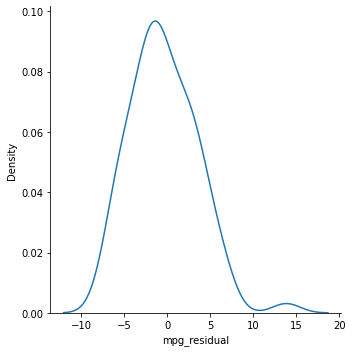

In [12]:
# Task 11 - Plot the residuals in a Seaborn KDE plot.

sns.displot(data = combined_mpg, kind = 'kde', x = 'mpg_residual');


In [13]:
# Task 12 - Melt the actual and predicted MPG columns together, 
#           assigning appropriate values to the variable and value names.

melted_mpg = pd.melt(combined_mpg, id_vars = ['weight'], value_vars = ['mpg', 'mpg_predicted'],
                    var_name = 'mpg_source', value_name = 'mpg_value')

melted_mpg.head()


,weight,mpg_source,mpg_value
0,1795,mpg,33.0
1,2625,mpg,28.0
2,2634,mpg,19.0
3,3940,mpg,13.0
4,4237,mpg,14.0


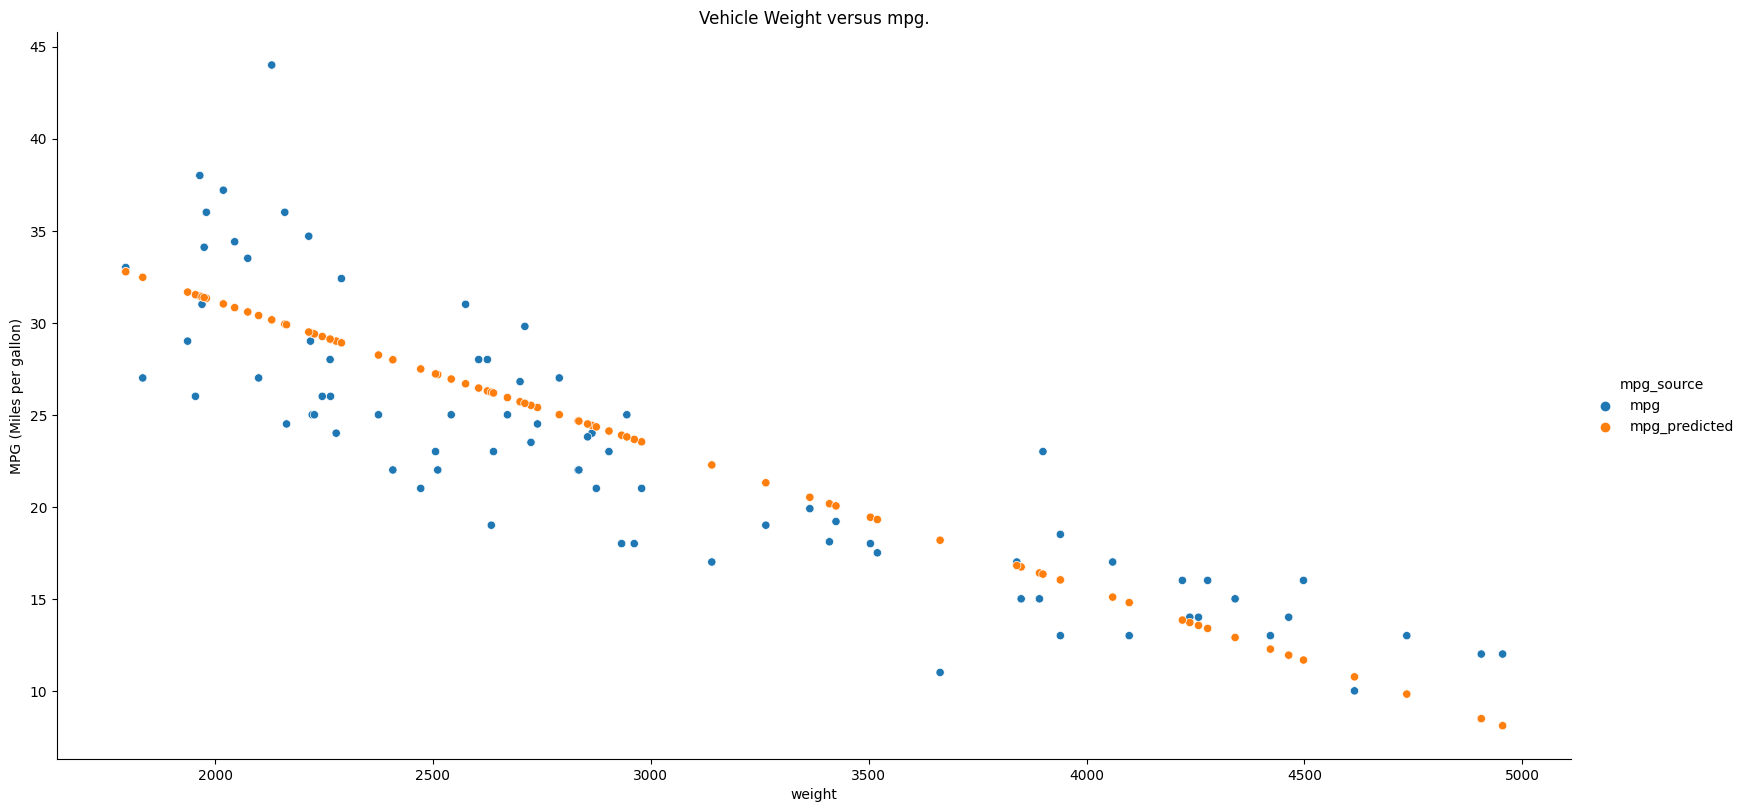

In [14]:
# Task 13 - Use a Seaborn scatter plot to plot the predicted data.

ax = sns.relplot(data = melted_mpg, x = 'weight', y = 'mpg_value', hue = 'mpg_source', height = 8, aspect = 2)

ax.set(title = 'Vehicle Weight versus mpg.', ylabel = 'MPG (Miles per gallon)');
